In [1]:
import os
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
## --- 설정 변수 정의 ---
## 이미지 경로 설정
# 입력 이미지 경로 (directory) 
img_path_list = "/src/data/DeepCrack/train/test_img"
# 저장 이미지 경로
save_path = "/src/hyebin/preprocessing/all_division_img/"

## 스텝 사이즈, 잘라낼 크기 설정
# 가로축 이동 거리
step_x = 20
# 세로축 이동 거리
step_y = 20
# 가로 범위
width = 50
# 세로 범위
height = 50

In [3]:
## --- 이미지 출력 함수 ---
def show_image(division_image_list, range_w, range_h):
    
    # pyplot의 현재 전체 이미지 크기를 백업 후 설정함
    tmp_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = (20,20)  # 너비, 높이 (in)
    
    start_idx = range_w * range_h
    for show_idx in range(start_idx):
        
        plt.subplot(range_h, range_w, show_idx+1)
        plt.imshow(division_image_list[show_idx])
        plt.axis('off')

    plt.show()
    plt.close()
    
    # 백업된 pyplot 이미지 크기를 복원함
    plt.rcParams["figure.figsize"] = tmp_size

In [6]:
## --- 이미지 분할 및 저장 함수 ---
def division_image(img_file_name, pil_img, step_x, step_y, width, height):
    
    (img_w, img_h) = pil_img.size
    print('img_size : {}'.format(pil_img.size))
 
    range_w = round(img_w/step_x)
    range_h = round(img_h/step_y)
    print('range_w : {},  range_h : {}'.format(range_w, range_h))
    
    # 이미지 이름별로 폴더 만들고 저장하기
    img_file_name = img_file_name.replace(".jpg", "")
    if not os.path.exists(save_path + img_file_name):  os.mkdir(save_path + img_file_name)
    
    i = 0
    division_list = []
    for h in range(range_h):  # height
        for w in range(range_w):  # weight
            # 가로 시작점(좌), 세로 시작점(상), 가로 범위(우), 세로 범위(하)
            bbox = (w*step_x, h*step_y, (w*step_x)+width, (h*step_y)+height)
            #print(bbox)
        
            # crop
            division_image = pil_img.crop(bbox)
 
            # save 
            fname = "{}.jpg".format("{0:05d}".format(i))
            save_name = save_path + img_file_name + "/" + fname
            #print(save_name)
            #division_image.save(save_name)
            
            i += 1
            division_list.append(division_image)
    
    return division_list, range_w, range_h

img_size : (384, 544)
range_w : 19,  range_h : 27


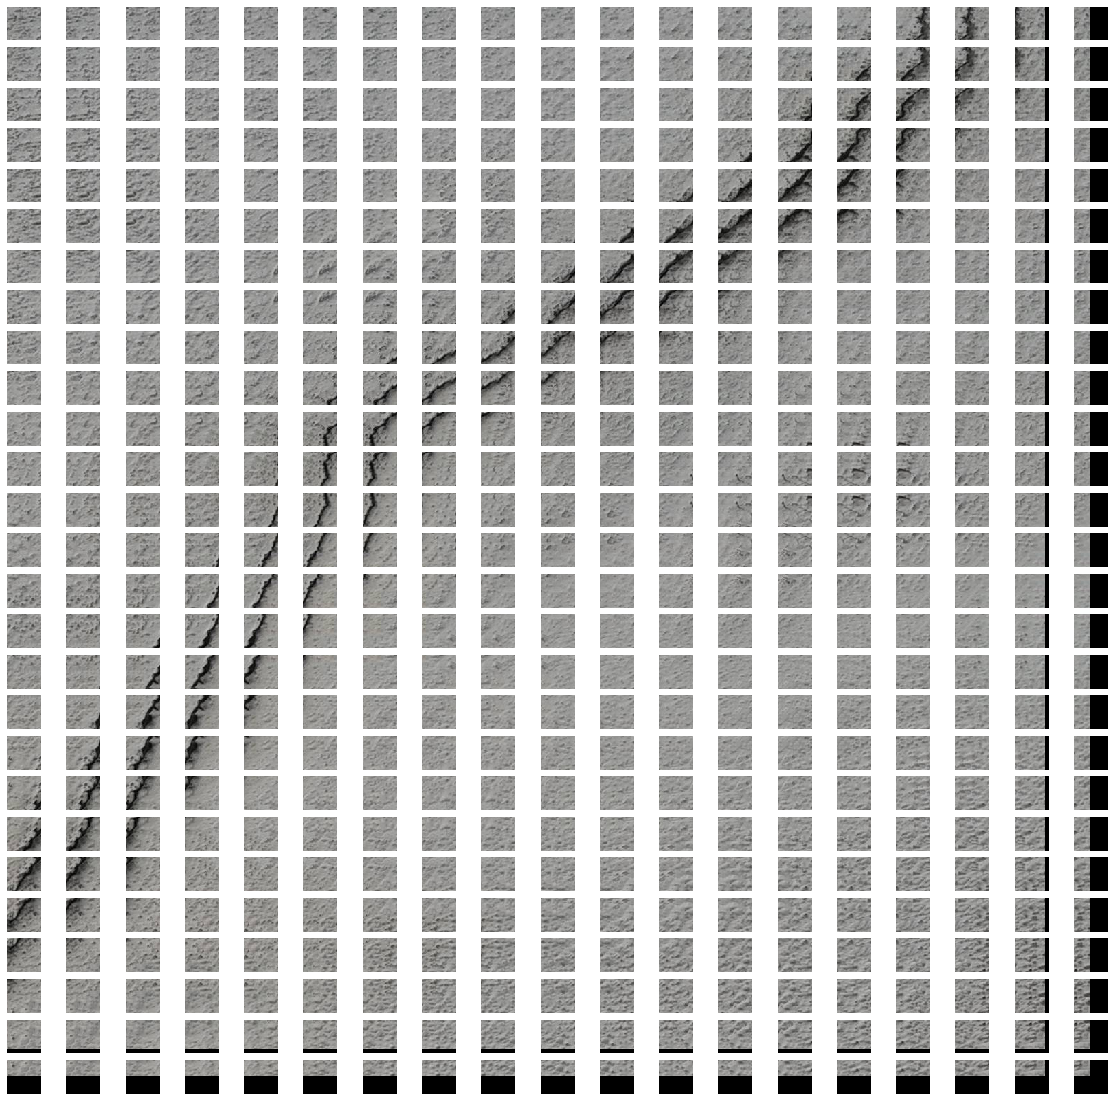

img_size : (384, 544)
range_w : 19,  range_h : 27


KeyboardInterrupt: 

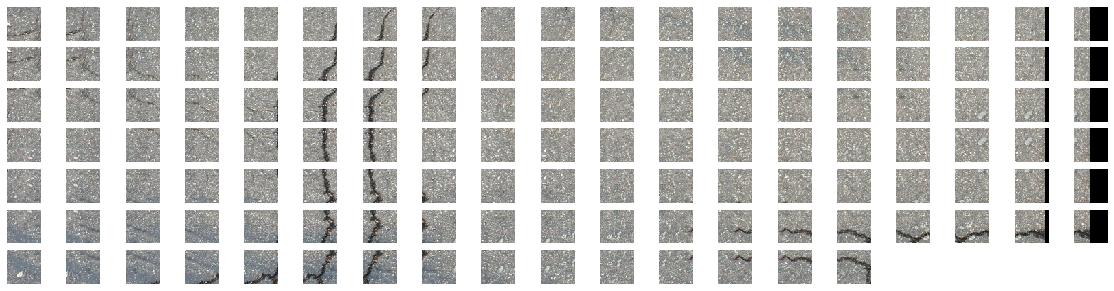

In [7]:
# jpg 또는 png 이미지 파일만 가져오기
img_file_list = [img_file for img_file in os.listdir(img_path_list) if img_file.endswith('.jpg') or img_file.endswith('.png')]

for img_file in img_file_list:
    img_path = "/".join([img_path_list, img_file])
    pil_img = Image.open(img_path)
    
    division_list, range_w, range_h = division_image(img_file, pil_img, step_x, step_y, width, height)
    show_image(division_list, range_w, range_h)

print("*** Saved ***")